* Radif Ramadan

* Data Science / JCSDOL-014

* Modul 3 - Day 40

---
---

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [113]:
titanic = sns.load_dataset('titanic')
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [114]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### **Isi Missing Value Jika Ada**

In [115]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [116]:
titanic.describe(include='all') 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')  
titanic['deck'].fillna('Unknown', inplace=True)

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

In [118]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### **Gunakan Kolom `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare` sebagai Independent Variabel**

### **Gunakan Kolom `Survived` sebagai Dependent Variabel**

In [119]:
titanic.replace({'male' : 0, 'female' : 1}, inplace = True)

In [120]:
x = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic.survived

### **Split data menjadi Train dan Test set dengan Proporsi 80 : 20 dan random state 42**

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

### **Lakukan Klasifikasi dengan KNN**

In [122]:
# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [123]:
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {train_accuracy:.4f}')

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Train Accuracy: 0.8062
Test Accuracy: 0.6592


### **Lakukan Scalling pada fitur**

In [124]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Lakukan Klasifikasi pada Fitur yg telah di Scalling**

In [125]:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

### **Lakukan Evaluasi terhadap Model tersebut**

In [126]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {test_accuracy:.4f}')

Accuracy: 0.8268


### **Bandingkan Evaluasi antara Train dan Test**

In [127]:
print("Evaluasi pada data train:")
print(classification_report(y_train, y_train_pred))
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

print("\nEvaluasi pada data test:")
print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Evaluasi pada data train:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       439
           1       0.85      0.79      0.82       273

    accuracy                           0.86       712
   macro avg       0.86      0.85      0.85       712
weighted avg       0.86      0.86      0.86       712

Train Accuracy: 0.8637640449438202

Evaluasi pada data test:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

Test Accuracy: 0.8268156424581006


### **Lakukan Manual Tuning untuk mencari Nilai K (tetangga) Paling optimum dari 1 - 150**

In [128]:
accuracy_scores = []
k_values = range(1, 151)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    y_test_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_test_pred))

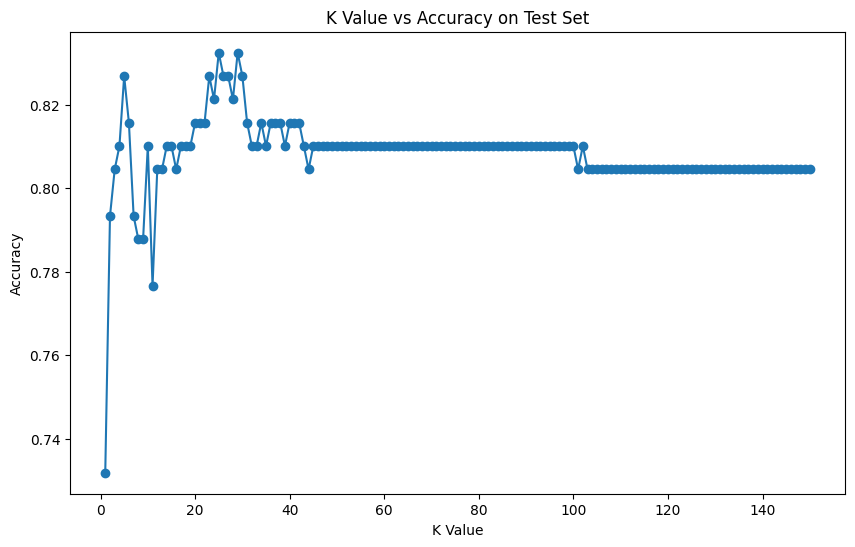

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K Value vs Accuracy on Test Set')
plt.show()

In [130]:
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Nilai K Optimal: {optimal_k}")

Nilai K Optimal: 25


In [131]:
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=25)

In [132]:
y_train_pred_optimal = knn_optimal.predict(X_train_scaled)
y_test_pred_optimal = knn_optimal.predict(X_test_scaled)

### **Lakukan Evaluasi terhadap Model tersebut**
### **Bandingkan Evaluasi antara Train dan Test**

In [133]:
train_accuracy = accuracy_score(y_train, y_train_pred_optimal)
print("Train set evaluation with optimal K:")
print(f"Accuracy: {train_accuracy}")
print(classification_report(y_train, y_train_pred_optimal))


test_accuracy = accuracy_score(y_test, y_test_pred_optimal)
print("\nTest set evaluation with optimal K:")
print(f"Accuracy: {test_accuracy}")
print(classification_report(y_test, y_test_pred_optimal))

Train set evaluation with optimal K:
Accuracy: 0.827247191011236
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       439
           1       0.80      0.73      0.76       273

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.83      0.83      0.83       712


Test set evaluation with optimal K:
Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.71      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



### **Buat Kesimpulan berdasarkan Evaluasi Model apakah Underfitting, Fit atau Overfitting**

* Berdasarkan **akurasi model training dan testing hampir seimbang** dengan selisih sangat kecil (0,01), menunjukkan bahwa model **tidak mengalami overfitting maupun underfitting secara signifikan**

* Pada **Evaluasi lainnya seperti Precision, Recall, dan F1-Score juga Seimbang** dengan perbedaan yang sangat kecil berkisar (0,01 - 0,02) pada tiap-tiap kelas menandakan model tidak terlalu kompleks sehingga **tidak overfitting**, tetapi juga cukup baik dalam menangkap pola dari data sehingga **tidak underfitting**.

📌 `Kesimpulan Akhir`: **Model KNN dengan K = 25** memiliki evaluasi dengan keseimbangan yang baik antara akurasi training dan testing, serta metrik evaluasi lainnya (precision, recall, f1-score) juga cukup stabil. Oleh karena itu, **model ini Fit** dan dapat digunakan untuk prediksi dengan tingkat generalisasi yang baik

### **Lakukan Klasifikasi juga dengan Decision Tree**

In [134]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_scaled, y_train)

y_train_pred_dtree = dt.predict(X_train_scaled)
y_test_pred_dtree = dt.predict(X_test_scaled)

train_dt_accuracy = accuracy_score(y_train, y_train_pred_dtree)
test_dt_accuracy = accuracy_score(y_test,y_test_pred_dtree)

print('Decision Tree Train Before Tuning:')
print(f'Accuracy: {train_dt_accuracy}')

print('\nDecision Tree Test Before Tuning:')
print(f'Accuracy: {test_dt_accuracy}')

Decision Tree Train Before Tuning:
Accuracy: 0.9817415730337079

Decision Tree Test Before Tuning:
Accuracy: 0.8044692737430168


### **Lakukan Manual tuning untuk Parameter min samples leaf dari range 1 – 150**

In [135]:
X_train

,pclass,sex,age,sibsp,parch,fare
692,3,0,28.0,0,0,56.4958
481,2,0,28.0,0,0,0.0000
527,1,0,28.0,0,0,221.7792
855,3,1,18.0,0,1,9.3500
801,2,1,31.0,1,1,26.2500
...,...,...,...,...,...,...
359,3,1,28.0,0,0,7.8792
258,1,1,35.0,0,0,512.3292
736,3,1,48.0,1,3,34.3750
462,1,0,47.0,0,0,38.5000


In [ ]:
leaf_range = range(1, 151)
train_accuracies = []
test_accuracies = []

for leaf in leaf_range:
    dt = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    dt.fit(X_train_scaled, y_train)
    
    train_acc = accuracy_score(y_train, dt.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, dt.predict(X_test_scaled))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
optimal_leaf = leaf_range[np.argmax(test_accuracies)]
print(f"Optimal min_samples_leaf: {optimal_leaf}, Accuracy: {max(test_accuracies):.4f}")


Optimal min_samples_leaf: 1, Accuracy: 0.8045


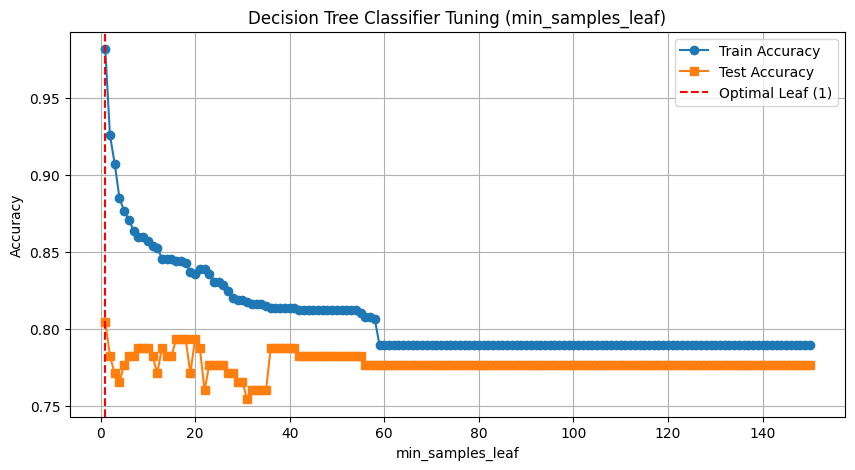

In [142]:
plt.figure(figsize=(10, 5))
plt.plot(leaf_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(leaf_range, test_accuracies, label='Test Accuracy', marker='s')
plt.axvline(optimal_leaf, color='r', linestyle='--', label=f'Optimal Leaf ({optimal_leaf})')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Tuning (min_samples_leaf)')
plt.legend()
plt.grid()
plt.show()

### **Bandingkan hasil Evaluasi Matrix dari seluruh model yg diuji coba**

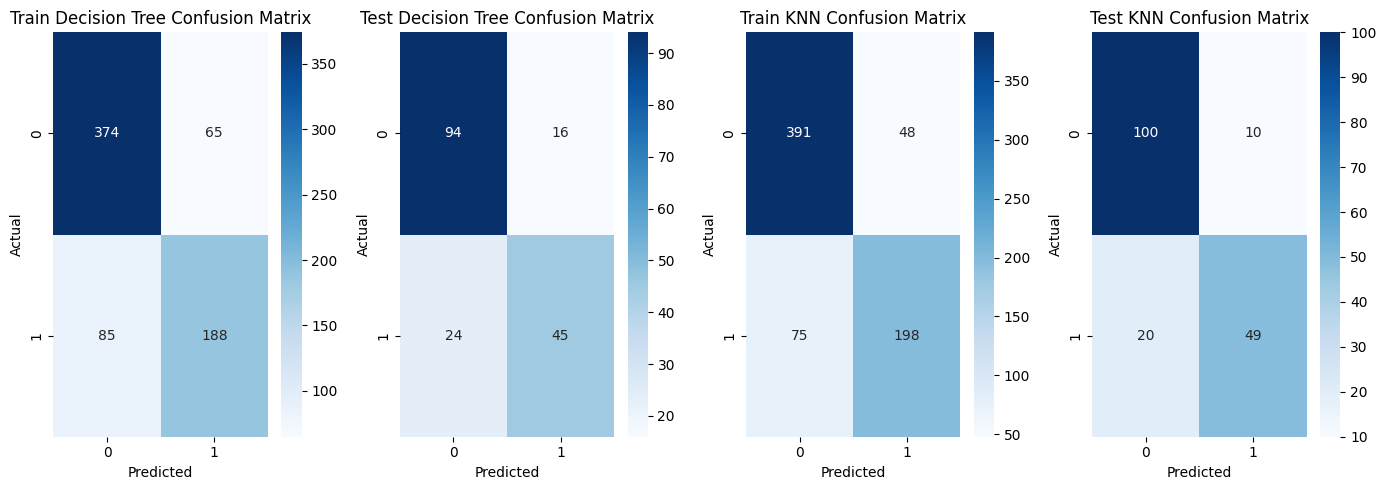

In [153]:
y_train_pred_dtree = dt.predict(X_train_scaled)
y_test_pred_dtree = dt.predict(X_test_scaled)

y_train_pred_knn = knn_optimal.predict(X_train_scaled)
y_test_pred_knn = knn_optimal.predict(X_test_scaled)

fig, axes = plt.subplots(1, 4, figsize=(14, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pred_dtree), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Train Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_test_pred_dtree), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_train, y_train_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Train KNN Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[3])
axes[3].set_title('Test KNN Confusion Matrix')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('Actual')


plt.tight_layout()
plt.show()